In [1]:
datafile = 'train.csv'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook') 

pd.options.display.max_rows = 1000
#pd.options.display.max_columns = 30

In [2]:
sns.set(style='white')

In [3]:
train = pd.read_csv(datafile)
quantitative = [p for p in train.columns if train[p].dtypes != 'object' ]
# Record all the Numerical variables
quantitative.remove('SalePrice')

qualitative = [p for p in train.columns if train[p].dtypes == 'object']
# Record all the qualitative variables

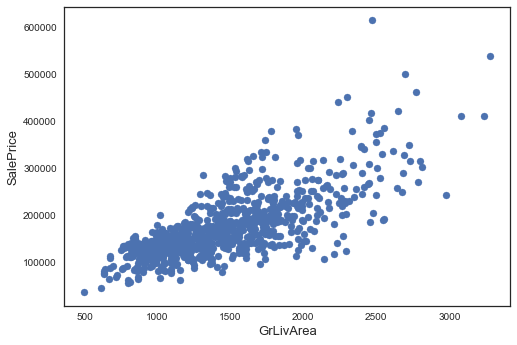

In [4]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [5]:
# Only possible outlier is observaiton 786
# It has a average Above grade living area, but really high SalePrice

In [6]:
train.iloc[786][['Neighborhood','YearBuilt','SalePrice','PoolArea','PoolQC']]

Neighborhood    NridgHt
YearBuilt          2003
SalePrice        615000
PoolArea            144
PoolQC               Ex
Name: 786, dtype: object

In [7]:
p_per_a = train.SalePrice / train.GrLivArea

In [8]:
#price_per_GArea.groupby(train.Neighborhood).describe()

In [9]:
#train[train.SalePrice==train.SalePrice.max()]
#train = train.drop(786)

In [10]:
Y = train.SalePrice.copy()

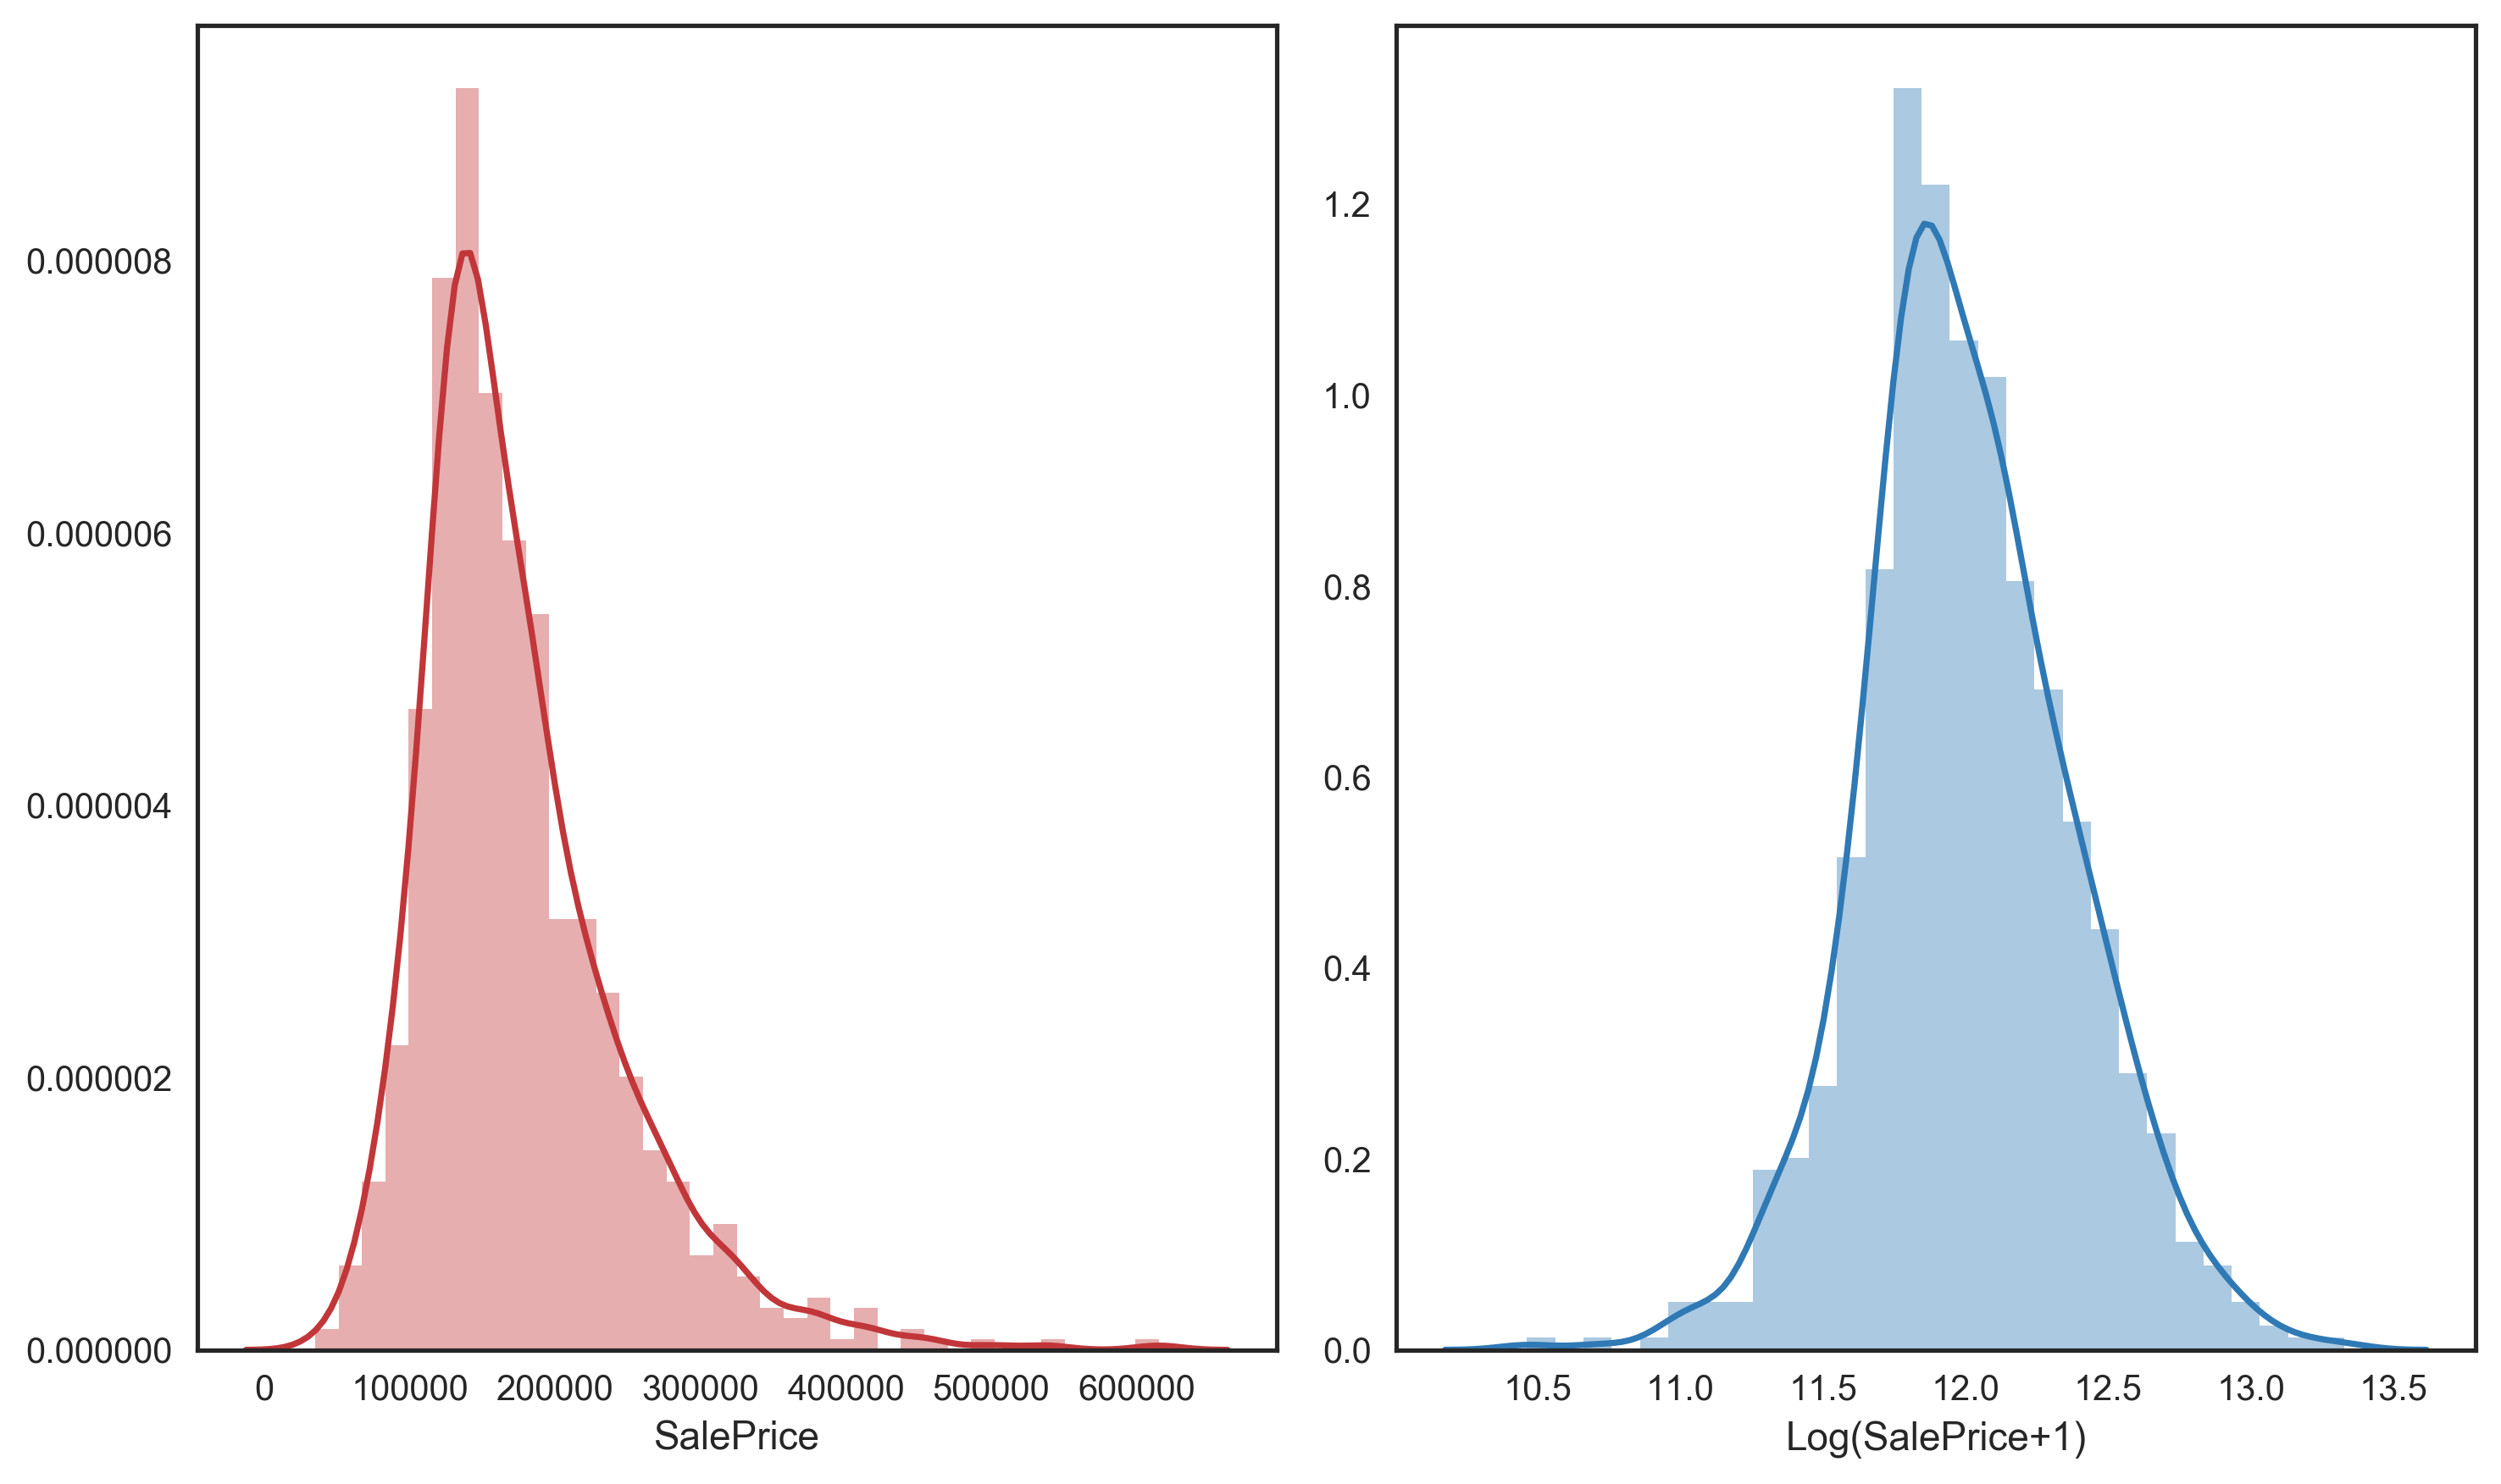

In [11]:
# Plot for SalePirce
p = sns.color_palette('RdBu')
sns.set(style='white')
fig , axes = plt.subplots(1,2,figsize=(10,6),dpi=300)
sns.distplot(Y,axlabel='SalePrice',color=p[0],ax=axes[0])
sns.distplot(np.log1p(Y),axlabel='Log(SalePrice+1)',color=p[5],ax=axes[1])

plt.tight_layout()

In [12]:
test = pd.read_csv('test.csv')

In [13]:
print(train.shape)
print(test.shape)

(804, 79)
(1608, 79)


In [14]:
d1 = train.drop('SalePrice',axis=1)
d2 = test.drop('Id',axis=1)
all_data = pd.concat(
    (d1,
     d2
     ),ignore_index=True)

## Identifying the missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

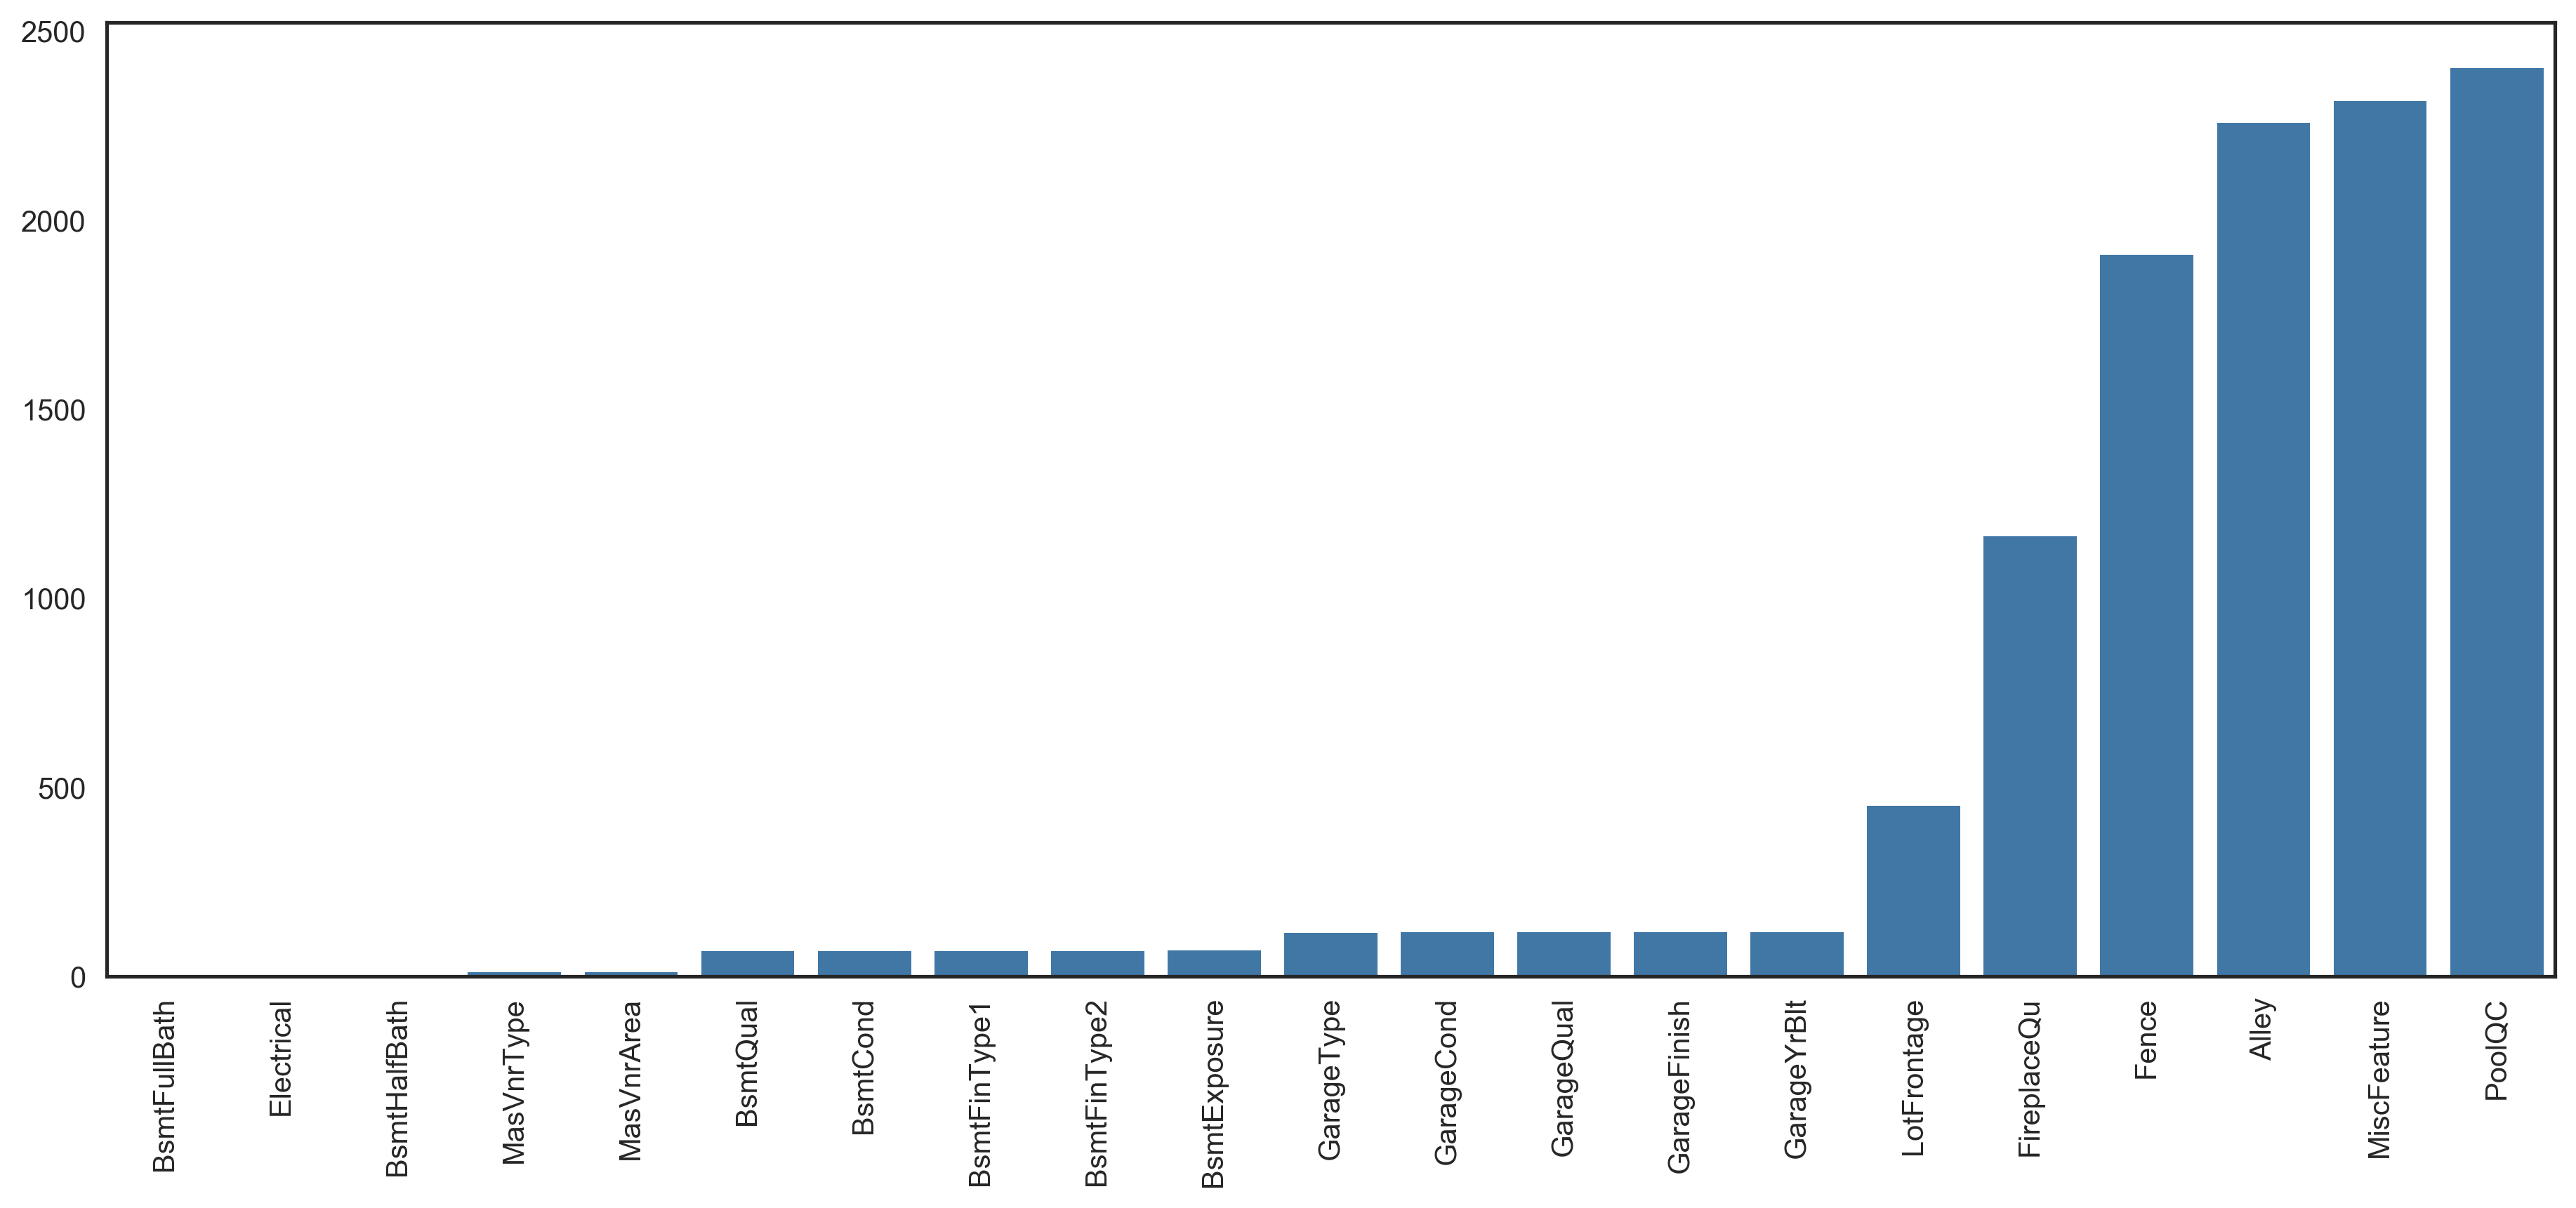

In [15]:
all_missing = all_data.isnull().sum()
all_missing = all_missing[all_missing>0]
all_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(15,6),dpi=300) # Changing the figure size, changing the DPI to make it more clear
sns.set(style='white')
ax = sns.barplot(x=all_missing.index,y=all_missing,color=p[5])
plt.xticks(rotation='90')


In [16]:
print(all_missing.index)
print(len(all_missing.index))

Index([u'BsmtFullBath', u'Electrical', u'BsmtHalfBath', u'MasVnrType',
       u'MasVnrArea', u'BsmtQual', u'BsmtCond', u'BsmtFinType1',
       u'BsmtFinType2', u'BsmtExposure', u'GarageType', u'GarageCond',
       u'GarageQual', u'GarageFinish', u'GarageYrBlt', u'LotFrontage',
       u'FireplaceQu', u'Fence', u'Alley', u'MiscFeature', u'PoolQC'],
      dtype='object')
21


<h2 class='text-center'> DataProcessing </h2>


### Filling the missing value

#### Pool quality

In [17]:
all_data.PoolQC.value_counts()

TA    3
Ex    2
Gd    2
Fa    2
Name: PoolQC, dtype: int64

In [18]:
(all_data.PoolArea != 0).sum()

9

In [19]:
# if any of the houses that have a NA for PoolQC recorded a PoolArea > 0
all_data[(all_data['PoolArea'] > 0 ) & (all_data.PoolQC.isnull())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType


In [20]:
# PoolQC : data description says NA means "no pool"
all_data.loc[:, "PoolQC"] = all_data.loc[:, "PoolQC"].fillna("None")

In [21]:
# Drop Pool
all_data = all_data.drop('PoolArea',axis=1)
all_data = all_data.drop('PoolQC',axis=1)

#### Alley

In [22]:
# Alley: NaN means no Alley
all_data.loc[:,"Alley"] = all_data.loc[:,"Alley"].fillna("None")
# 1 Done

#### Basement type

In [23]:
# Check whether all Basement variable have missing value, given same observation 
col = ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','BsmtFinSF1','TotalBsmtSF']
all_data[all_data.BsmtExposure.isnull()][col]

,BsmtExposure,BsmtCond,BsmtQual,BsmtFinType1,BsmtFinType2,BsmtFinSF1,TotalBsmtSF
73,NaN,NaN,NaN,NaN,NaN,0.0,0.0
99,NaN,NaN,NaN,NaN,NaN,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,0.0,0.0
204,NaN,NaN,NaN,NaN,NaN,0.0,0.0
304,NaN,NaN,NaN,NaN,NaN,0.0,0.0
339,NaN,NaN,NaN,NaN,NaN,0.0,0.0
381,NaN,NaN,NaN,NaN,NaN,0.0,0.0
384,NaN,TA,Gd,Unf,Unf,0.0,936.0
389,NaN,NaN,NaN,NaN,NaN,0.0,0.0
433,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [24]:
print(all_data['BsmtExposure'].isnull().sum())
print(all_data['BsmtCond'].isnull().sum())
print(all_data['BsmtQual'].isnull().sum())
print(all_data['BsmtFinType1'].isnull().sum())
print(all_data['BsmtFinType2'].isnull().sum())

69
67
67
67
68


In [25]:
a = list(np.where(all_data['BsmtExposure'].isnull()==True)[0])
b = list(np.where(all_data['BsmtCond'].isnull()==True)[0])
for i in a:
    if i not in b:
        print(i)
print("*********")
c = list(np.where(all_data['BsmtFinType2'].isnull()==True)[0])
for i in c:
    if i not in b:
        print(i)

384
1699
*********
1924


3 Observations are werid, we mannually fill Nan value.

In [26]:
all_data.iloc[384,:][['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','TotalBsmtSF']]

BsmtExposure    NaN
BsmtCond         TA
BsmtQual         Gd
BsmtFinType1    Unf
BsmtFinType2    Unf
TotalBsmtSF     936
Name: 384, dtype: object

In [27]:
all_data.loc[1699,:][['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','TotalBsmtSF']]

BsmtExposure     NaN
BsmtCond          TA
BsmtQual          Gd
BsmtFinType1     Unf
BsmtFinType2     Unf
TotalBsmtSF     1595
Name: 1699, dtype: object

In [28]:
all_data.loc[1924,:][['BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF']]

BsmtExposure      No
BsmtCond          TA
BsmtQual          Gd
BsmtFinType1     GLQ
BsmtFinType2     NaN
BsmtFinSF2       479
TotalBsmtSF     3206
Name: 1924, dtype: object

In [29]:
# Correcting the two observations
all_data = all_data.set_value(384,'BsmtExposure','No')
all_data = all_data.set_value(1699,'BsmtExposure','No')
all_data = all_data.set_value(1924,'BsmtFinType2','GLQ')

In [30]:
print(all_data['BsmtExposure'].isnull().sum())
print(all_data['BsmtCond'].isnull().sum())
print(all_data['BsmtQual'].isnull().sum())
print(all_data['BsmtFinType1'].isnull().sum())
print(all_data['BsmtFinType2'].isnull().sum())
print((all_data['TotalBsmtSF']==0).sum())

67
67
67
67
67
67


In [31]:
# BsmtQual etc : data description says NA for basement features is "no basement"
all_data.loc[:, "BsmtQual"] = all_data.loc[:, "BsmtQual"].fillna("None")

all_data.loc[:, "BsmtCond"] = all_data.loc[:, "BsmtCond"].fillna("None")

all_data.loc[:, "BsmtExposure"] = all_data.loc[:, "BsmtExposure"].fillna("None")
# Potential Problem here : 

all_data.loc[:, "BsmtFinType1"] = all_data.loc[:, "BsmtFinType1"].fillna("None")

all_data.loc[:, "BsmtFinType2"] = all_data.loc[:, "BsmtFinType2"].fillna("None")

# 5 Done

#### Fence

In [32]:
# Fence : data description says NA means "no fence"
all_data.loc[:, "Fence"] = all_data.loc[:, "Fence"].fillna("None")
# 1 Done

#### FireplaceQU

In [33]:
((all_data.FireplaceQu.isnull()) | (all_data.Fireplaces == 0)).sum()

1164

In [34]:
len(all_data[all_data['Fireplaces'] == 0])

1164

In [35]:
# FireplaceQu : data description says NA means "no fireplace"
all_data.loc[:, "FireplaceQu"] = all_data.loc[:, "FireplaceQu"].fillna("None")
# 1 Done

#### Utilities

In [36]:
# Utilities, drop this varibale 
print(all_data.Utilities.value_counts())
all_data = all_data.drop(['Utilities'], axis=1)
# Also indicating all houses have electricity

AllPub    2410
NoSewr       2
Name: Utilities, dtype: int64


#### GarageQual

In [37]:
col = ['GarageArea', 'GarageCars', 'GarageQual', 'GarageFinish', 'GarageCond', 'GarageType']
all_data[all_data.GarageQual.isnull()][col]

,GarageArea,GarageCars,GarageQual,GarageFinish,GarageCond,GarageType
9,0.0,0.0,NaN,NaN,NaN,NaN
11,0.0,0.0,NaN,NaN,NaN,NaN
108,0.0,0.0,NaN,NaN,NaN,NaN
125,0.0,0.0,NaN,NaN,NaN,NaN
137,0.0,0.0,NaN,NaN,NaN,NaN
160,0.0,0.0,NaN,NaN,NaN,NaN
178,0.0,0.0,NaN,NaN,NaN,NaN
212,0.0,0.0,NaN,NaN,NaN,NaN
220,0.0,0.0,NaN,NaN,NaN,NaN
228,0.0,0.0,NaN,NaN,NaN,NaN


In [38]:
print(np.where(all_data.GarageArea== 0)[0].shape[0])
print(np.where(all_data.GarageCars == 0)[0].shape[0])
print(all_data.GarageQual.isnull().sum())
print(all_data.GarageType.isnull().sum())
print(all_data.GarageFinish.isnull().sum())
print(all_data.GarageCond.isnull().sum())

116
116
117
116
117
117


In [39]:
l1 = list(np.where(all_data.GarageType.isnull()==True)[0])
l2 = list(np.where(all_data.GarageFinish.isnull()==True)[0])

In [40]:
for i in l2:
    if i not in l1:
        print(i)

1923


In [41]:
all_data.iloc[1923][['GarageType','GaregeFinish','GarageQual','GarageCond','GarageYrBlt','YearBuilt','YrSold']]

GarageType      Detchd
GaregeFinish       NaN
GarageQual         NaN
GarageCond         NaN
GarageYrBlt        NaN
YearBuilt         1910
YrSold            2008
Name: 1923, dtype: object

we need to mannually fill __observation 1923__

In [42]:
l1 = (all_data.GarageType == 'Detchd')

In [43]:
print(l1.sum())
print((all_data[l1]['GarageYrBlt'] == all_data[l1]['YearBuilt']).sum())
# Half of the house with detchd type garage
#  The Garage Year bulit and the year house is built is same

684
329


In [44]:
print(all_data['GarageFinish'].groupby(all_data.GarageType).describe().loc['Detchd','top'])

Unf


In [45]:
# Mannually fill the Nans for this observation, by finding the most frequent values, given similar area and garagecars 
idx = (all_data.GarageArea < 370) & (all_data.GarageArea > 350) & (all_data.GarageCars == 1 )
l1 = ['GarageFinish','GarageQual','GarageCond']
for i in l1:   
    all_data = all_data.set_value(1923,i,all_data[idx][i].value_counts().idxmax())
    #print(all_data[i].groupby(all_data.GarageType).describe().loc['Detchd',:])
all_data = all_data.set_value(1923,'GarageYrBlt',all_data.loc[1923,'YearBuilt'])


In [46]:
# Check
all_data.loc[1923,:][['GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt','YearBuilt','YrSold']]

GarageType      Detchd
GarageFinish       Unf
GarageQual          TA
GarageCond          TA
GarageYrBlt       1910
YearBuilt         1910
YrSold            2008
Name: 1923, dtype: object

In [47]:
# Double check 
print(np.where(all_data.GarageArea== 0)[0].shape[0])
print(all_data.GarageQual.isnull().sum())
print(all_data.GarageType.isnull().sum())
print(all_data.GarageFinish.isnull().sum())
print(all_data.GarageCond.isnull().sum())
print(all_data.GarageYrBlt.isnull().sum())

116
116
116
116
116
116


In [48]:
# GarageType etc : data description says NA for garage features is "no garage"
# 'GarageCond', 'GarageQual','GarageFinish', 'GarageType', 'GarageYrBlt',

all_data.loc[:, "GarageType"] = all_data.loc[:, "GarageType"].fillna("None")


all_data.loc[:, "GarageFinish"] = all_data.loc[:, "GarageFinish"].fillna("None")


all_data.loc[:, "GarageQual"] = all_data.loc[:, "GarageQual"].fillna("None")


all_data.loc[:, "GarageCond"] = all_data.loc[:, "GarageCond"].fillna("None")


all_data.loc[:, "GarageYrBlt"] = all_data.loc[:, "GarageYrBlt"].fillna(0)

# 5 Done

#### LotFrontage

In [49]:
# LotFrontage : NA 
# LotFrontage, continuting filling the missing value
#    Linear feet of street connected to property
# e area of each street connected to the house property is most likely going to have a similar area to other houses in its neighborhood.
# We can group by each neighborhood and take the median of each LotFrontage and fill the missing values of each LotFrontage based on what neighborhood the house comes from.

#  Grouped by neighborhood and fill in missing value by the median Lotfrontage of all the neighborhood

# Important here: we could first process the variable 'Neighborhood' here

#all_data.loc[:, "LotFrontage"] = all_data.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# 1 Done

'''
Drop Lot Frontage & Lot Area
'''

'\nDrop Lot Frontage & Lot Area\n'

In [50]:
all_data = all_data.drop('LotFrontage',axis=1)

In [51]:
#all_data[all_data.loc[:, "LotFrontage"].isnull()][['Neighborhood','LotFrontage']]

In [52]:
#all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mode()[0])

In [53]:
print(all_data.MasVnrType.isnull().sum())
print((all_data.MasVnrArea==0).sum())
print(all_data.MasVnrArea.isnull().sum())
print((all_data.MasVnrType == 'None').sum())

11
1474
11
1481


In [54]:
idx = (all_data.MasVnrType =='None') & (all_data.MasVnrArea != 0 ) # Finding the observations with missing value in MasType, 
                                                                    # But do have MasVnr Area.

#all_data[all_data[idx]['MasVnrArea'] != 0] 
#[['MasVnrType','MasVnrArea']]

In [55]:
all_data[idx][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
300,None,312.0
341,None,288.0
426,None,285.0
669,None,344.0
1620,None,1.0
1778,None,1.0
1834,None,1.0


In [56]:
for i in list(all_data[idx][['MasVnrType','MasVnrArea']].index) :
    all_data = all_data.set_value(i,'MasVnrType','BrkFace')

In [57]:
all_data['MasVnrType'].value_counts()

None       1474
BrkFace     756
Stone       153
BrkCmn       18
Name: MasVnrType, dtype: int64

In [58]:
print(all_data.MiscFeature.isnull().sum())
print((all_data.MiscVal == 0).sum())
print(all_data.shape)

2316
2318
(2412, 74)


In [59]:
idx = (all_data.MiscVal == 0) 
all_data[idx][all_data[idx].MiscFeature.isnull()==False][['MiscFeature','MiscVal']]
#['MiscFeature'] =='None').sum()
#idx.sum()

,MiscFeature,MiscVal
116,Shed,0
1936,Othr,0


In [60]:
# Mannually correction
all_data = all_data.set_value(116,'MiscFeature','None')
all_data = all_data.set_value(1936,'MiscFeature','None')

In [61]:
# MasVnrType : NA most likely means no veneer
all_data.loc[:, "MasVnrType"] = all_data.loc[:, "MasVnrType"].fillna("None")

all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
all_data.loc[:, "MiscFeature"] = all_data.loc[:, "MiscFeature"].fillna("None")

# 3 Done

In [62]:
all_data.isnull().sum().sum()

3

In [63]:
all_data[all_data['BsmtFullBath'].isnull()][['BsmtFullBath','BsmtHalfBath']]

,BsmtFullBath,BsmtHalfBath
1048,NaN,NaN


In [64]:
# For the observation (in test data) has missing value of BsmtFullBath and BsmtHalfBath
#  I consider there is 0 bathroom for this observation

all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

In [65]:
all_data[all_data['Electrical'].isnull()]

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
1111,80,RL,9735,Pave,None,Reg,Lvl,Inside,Gtl,Timber,...,0,0,0,0,None,None,0,5,2008,WD


In [66]:
all_data[(all_data['YrSold']>2007) & (all_data['OverallQual']>4) ]['Electrical'].head()
# Most house finished after 2007, with 5 OverallQual has SBrkr electircal system or FuseA electircal system

0    SBrkr
1    FuseA
2    SBrkr
3    SBrkr
6    SBrkr
Name: Electrical, dtype: object

In [67]:
# This house has missing value for Electrical system
# It's new house, finished in 2008, with several good qualtities. 
#  So I fill the NaN in electrical system with SBrkr, 'Standard Circuit Breakers & Romex'.

all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')

In [68]:
all_data['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP'], dtype=object)

In [69]:
# Checek 
all_data.isnull().sum().sum()

0

<h2 class='text-center'> EDA </h2>


## Converting some numerical variables to categorical variables

In [70]:
a = all_data['MSSubClass'].unique()
print(np.sort(a))

[ 20  30  40  45  50  60  70  75  80  85  90 120 150 160 180 190]


In [71]:
print(np.sort(test['MSSubClass'].unique()))

[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]


In [72]:
# quantitative
# MSSubClass
# MoSold :  MonthSold
all_data = all_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

## Analysis of numercial variable

In [73]:
ntrain = train.shape[0]
train = all_data[:ntrain].copy()
test = all_data[ntrain:].copy()

In [74]:
train['SalePrice'] = Y

In [75]:
print(((all_data.BsmtFinSF1 + all_data.BsmtFinSF2 + all_data.BsmtUnfSF) == all_data.TotalBsmtSF).sum())
print(len(all_data))

2412
2412


In [76]:
print(((all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data.LowQualFinSF ) == all_data.GrLivArea).sum())

2412


In [77]:
print((all_data.LowQualFinSF == 0).sum())

2381


In [78]:
# Drop some high-corrleated variable
all_data = all_data.drop('GarageCars',axis=1)
all_data = all_data.drop('BsmtFinSF1',axis=1)
all_data = all_data.drop('BsmtFinSF2',axis=1)
all_data = all_data.drop('1stFlrSF',axis=1)

In [79]:
# plt.scatter(train.KitchenAbvGr,Y)
#train.KitchenAbvGr.shape
# all_data.TotRmsAbvGrd -( all_data.KitchenAbvGr + all_data.BedroomAbvGr )

## Categorical variables

## Quality, Condition categorical variable

In [80]:
all_data.FireplaceQu.value_counts()

None    1164
Gd       555
TA       554
Fa        68
Po        43
Ex        28
Name: FireplaceQu, dtype: int64

In [81]:
all_data.OverallQual.value_counts()

5     715
6     640
7     493
8     256
4     185
9      64
3      32
10     14
2      10
1       3
Name: OverallQual, dtype: int64

In [82]:
all_data.CentralAir.value_counts()

Y    2259
N     153
Name: CentralAir, dtype: int64

In [83]:
dataplot = train.SalePrice.groupby(train['FireplaceQu']).mean()
# fig , ax = plt.subplots()

In [84]:
categorical = [p for p in all_data.columns if all_data[p].dtypes == 'object']
quality_or_condition = []
for i in categorical:
    if 'Qual' in i:
        quality_or_condition.append(i) 
    if 'Cond' in i:
        quality_or_condition.append(i)
    if 'Qu' in i:
        if 'Qual' not in i:
            quality_or_condition.append(i)
    if 'QC' in i:
        quality_or_condition.append(i)

In [85]:
quality_or_condition

['Condition1',
 'Condition2',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond']

In [86]:
quality_or_condition = quality_or_condition[2:]

In [87]:
for i in quality_or_condition:
    if i not in ['ExterQual', 'ExterCond', 'GarageQual', 'GarageCond', 
 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual']:
        print (i)

BsmtCond


In [88]:
len(quality_or_condition)

9

In [89]:
def convert_Quality_measurements(df):
    qual_dict = {'None': 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    df["ExterQual"] = df["ExterQual"].map(qual_dict).astype(int)
    df["ExterCond"] = df["ExterCond"].map(qual_dict).astype(int)
    df["BsmtQual"] = df["BsmtQual"].map(qual_dict).astype(int)
    df["BsmtCond"] = df["BsmtCond"].map(qual_dict).astype(int)
    df["HeatingQC"] = df["HeatingQC"].map(qual_dict).astype(int)
    df["KitchenQual"] = df["KitchenQual"].map(qual_dict).astype(int)
    df["FireplaceQu"] = df["FireplaceQu"].map(qual_dict).astype(int)
    df["GarageQual"] = df["GarageQual"].map(qual_dict).astype(int)
    df["GarageCond"] = df["GarageCond"].map(qual_dict).astype(int)
    #df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)
    return df

In [90]:
all_data = convert_Quality_measurements(all_data)

In [91]:
all_data.FireplaceQu.value_counts()

0    1164
4     555
3     554
2      68
1      43
5      28
Name: FireplaceQu, dtype: int64

In [92]:
all_data["BsmtExposure"] = all_data["BsmtExposure"].map(
        {'None': 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

In [93]:
bsmt_fin_dict = {'None': 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

In [94]:
all_data.Functional.value_counts()

Typ     2239
Min2      63
Min1      55
Mod       30
Maj1      18
Maj2       7
Name: Functional, dtype: int64

In [95]:
all_data["Functional"] = all_data["Functional"].map(
        {'None': 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

all_data["GarageFinish"] = all_data["GarageFinish"].map(
        {'None': 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

all_data["Fence"] = all_data["Fence"].map(
        {'None': 0, "MnWw": 1, "GdWo": 1, "MnPrv": 2, "GdPrv": 3}).astype(int)

In [96]:
all_data.PavedDrive.value_counts()

Y    2175
N     178
P      59
Name: PavedDrive, dtype: int64

In [97]:
train['SalePrice'].groupby(train['PavedDrive']).mean()

PavedDrive
N    105223
P    131841
Y    181774
Name: SalePrice, dtype: int64

In [98]:
train['SalePrice'].groupby(train['PavedDrive']).describe()

PavedDrive       
N           count        56.000000
            mean     105223.428571
            std       33979.477458
            min       35000.000000
            25%       83625.000000
            50%      107750.000000
            75%      123000.000000
            max      190000.000000
P           count        18.000000
            mean     131841.666667
            std       41766.360831
            min       78000.000000
            25%       99000.000000
            50%      129200.000000
            75%      142500.000000
            max      235000.000000
Y           count       730.000000
            mean     181774.258904
            std       69348.699909
            min       62383.000000
            25%      135000.000000
            50%      164950.000000
            75%      213000.000000
            max      615000.000000
Name: SalePrice, dtype: float64

In [99]:
all_data["PavedDrive"] = all_data["PavedDrive"].map(
        {'N': 0, "P": 1, "Y": 2}).astype(int)

In [100]:
def create_new_variable(df):
    # IR2 and IR3 don't appear that often, so just make a distinction
    # between regular and irregular.
    df["IsRegularLotShape"] = (df["LotShape"] == "Reg") * 1 # False * 1 = 0 

    # Most properties are level; bin the other possibilities together
    # as "not level".
    df["IsLandLevel"] = (df["LandContour"] == "Lvl") * 1

    # Most land slopes are gentle; treat the others as "not gentle".
    df["IsLandSlopeGentle"] = (df["LandSlope"] == "Gtl") * 1

    # Most properties use standard circuit breakers.
    df["IsElectricalSBrkr"] = (df["Electrical"] == "SBrkr") * 1

    # About 2/3rd have an attached garage.
    df["IsGarageAttchd"] = (df["GarageType"] == "Attchd") * 1

    # Most have a paved drive. Treat dirt/gravel and partial pavement
    # as "not paved".
    df["IsPavedDrive"] = (df["PavedDrive"] == 2) * 1

    # The only interesting "misc. feature" is the presence of a shed.
    df["HasShed"] = (df["MiscFeature"] == "Shed") * 1.  

    # If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    #df["Remodeled"] = (df['YearRemod/Add'] != df["YearBuilt"]) * 1
    
    # Did a remodeling happen in the year the house was sold?
    #df["RecentRemodel"] = (df['YearRemod/Add'] >= df["YrSold"].apply(int)) * 1
    
    # Was this house sold in the year it was built?
    #df["VeryNewHouse"] = (df["YearBuilt"] == df["YrSold"].apply(int)) * 1
    
    df["Has2ndFloor"] = (df["2ndFlrSF"] > 0) * 1
    df["HasMasVnr"] = (df["MasVnrArea"] > 0) * 1
    df["HasWoodDeck"] = (df["WoodDeckSF"] > 0) * 1
    df["HasOpenPorch"] = (df["OpenPorchSF"] > 0) * 1
    df["HasEnclosedPorch"] = (df["EnclosedPorch"] > 0) * 1
    df["Has3SsnPorch"] = (df["3SsnPorch"] > 0) * 1
    df["HasScreenPorch"] = (df["ScreenPorch"] > 0) * 1

    df["Age"] = 2016 - df["YearBuilt"]
    
    df["TimeSinceSold"] = 2016 - df["YrSold"]
  
    df["YearsSinceRemodel"] = df["YrSold"] - df['YearRemod/Add']
    
    df = df.drop('YrSold',axis=1)
    df = df.drop('YearBuilt',axis=1)
    df = df.drop('YearRemod/Add',axis=1)
    
    return df

In [101]:
all_data = create_new_variable(all_data)

In [102]:
all_data.shape

(2412, 84)

In [103]:
## Month sold
datahis = train.SalePrice.groupby(train.MoSold).mean()
## Histogram!!

In [104]:
datahis = datahis.sort_values()
datahis

MoSold
Oct    157386
Nov    164836
Mar    164968
Apr    167175
Jul    171107
May    171241
Jan    175711
Dec    176263
Aug    185346
Sep    185442
Feb    186417
Jun    190003
Name: SalePrice, dtype: int64

In [105]:
#train.SalePrice.groupby(train.MoSold).describe()

## Neighborhood

In [106]:
# Check for the price/area for house grouping by neighborhood
price_per_GArea = (train.SalePrice / train.GrLivArea).groupby(train.Neighborhood).mean()

In [107]:
#price_per_GArea = price_per_GArea.sort_values()

In [108]:
price_neighborhood = train.SalePrice.groupby(train.Neighborhood).mean()
price_neighborhood = price_neighborhood.sort_values()

In [109]:
'''
StoneBr, NoRidge, NridgHt have a large gap between them versus the rest of the median prices 
from any of the other neighborhods. 
It would be wise of us to check if this is from outliers or if these houses are much pricier as a whole.
'''
# rich  ['Crawfor', 'Somerst, Timber', 'StoneBr', 'NoRidge', 'NridgeHt']
all_data['GOODneighborhood'] = (
    (all_data.Neighborhood =='StoneBR') | (all_data.Neighborhood == 'Veenker') |(all_data.Neighborhood == 'Greens') | 
    (all_data.Neighborhood == 'NridgHt') | ((all_data.Neighborhood == 'Crawfor'))
    | ((all_data.Neighborhood == 'NoRidge'))  | ((all_data.Neighborhood == 'Timber')) | ((all_data.Neighborhood == 'Somerst'))
    )*1

## Condition 1

In [110]:
price_perarea = train.SalePrice / train.GrLivArea

In [111]:
p1 = price_perarea.groupby(train.Condition1).mean()
p1 = p1.sort_values()
print(p1)

Condition1
Artery     89.855796
PosA      103.540150
Feedr     109.129597
RRNn      115.393103
RRNe      118.702753
Norm      122.895801
PosN      128.077780
RRAn      131.807563
RRAe      135.139528
dtype: float64


In [112]:
all_data['Near_park_Condition12'] = ((all_data['Condition1'] =='PosN') | (all_data['Condition1'] =='PosA') 
                                | (all_data['Condition2'] =='PosN') | (all_data['Condition2'] =='PosA')) *1

In [113]:
#train.Condition1.value_counts()

In [114]:
#train.Condition2.value_counts()

In [115]:
all_data = all_data.drop('Condition1',axis=1)
all_data = all_data.drop('Condition2',axis=1)

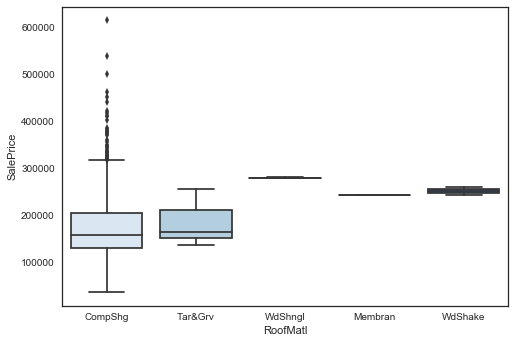

In [116]:
fig, ax = plt.subplots()
sns.boxplot(x='RoofMatl',y=Y,data=train,palette='Blues')

In [117]:
all_data = all_data.drop('RoofMatl',axis=1)
all_data = all_data.drop('Exterior1st',axis=1)
all_data = all_data.drop('Exterior2nd',axis=1)

In [118]:
# Drop some other 
all_data = all_data.drop('GarageYrBlt',axis=1)

In [119]:
numerical = list(all_data.dtypes[all_data.dtypes != "object"].index)
categorical = list(all_data.dtypes[all_data.dtypes == "object"].index)

In [120]:
train.ExterCond.value_counts()

TA    694
Gd     93
Fa     14
Ex      3
Name: ExterCond, dtype: int64

In [121]:
test.ExterCond.value_counts()

TA    1386
Gd     173
Fa      39
Ex       8
Po       2
Name: ExterCond, dtype: int64

In [122]:
len(categorical)+len(numerical)

80

In [123]:
ntrain = train.shape[0]
train = all_data[:ntrain].copy()
test = all_data[ntrain:].copy()

In [124]:
werid_categorical = {}
for i in categorical:
    u1 = train[i].unique()
    u2 = test[i].unique()
    if len(u1) != len(u2):
        print('We are now in variable:',i)
        print(len(u2)-len(u1),'different levels between train data and test data')
        werid_categorical[i] = 0
        # Check which level is the unique one
        
        for l in u2:
            if l not in u1:
                print('-----')
                print('the test data has a new level:',l)
                #print((test[i]==l).sum(),'observations in test data has this new level',l)
        print('*************')

('We are now in variable:', 'MSSubClass')
(-1, 'different levels between train data and test data')
*************
('We are now in variable:', 'MSZoning')
(1, 'different levels between train data and test data')
-----
('the test data has a new level:', 'A (agr)')
*************
('We are now in variable:', 'Neighborhood')
(2, 'different levels between train data and test data')
-----
('the test data has a new level:', 'GrnHill')
-----
('the test data has a new level:', 'Landmrk')
*************
('We are now in variable:', 'Heating')
(-1, 'different levels between train data and test data')
*************
('We are now in variable:', 'MiscFeature')
(2, 'different levels between train data and test data')
-----
('the test data has a new level:', 'TenC')
-----
('the test data has a new level:', 'Othr')
*************
('We are now in variable:', 'SaleType')
(-2, 'different levels between train data and test data')
*************


In [125]:
test[test['MSZoning']=='A (agr)']

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,Age,TimeSinceSold,YearsSinceRemodel,GOODneighborhood,Near_park_Condition12
850,SC20,A (agr),31250,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,...,0,0,1,0,0,65,10,55,0,0


In [126]:
all_data.MSZoning.value_counts()

RL         1890
RM          394
FV           92
RH           20
C (all)      13
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [127]:
# MSZoning
# test2[test2['MSZoning']=='A (agr)']
re1 = all_data['MSZoning'].value_counts().idxmax()
# Replacing with the most frequent level
test = test.set_value(850,'MSZoning',re1)
test.loc[850,'MSZoning']

'RL'

In [128]:
test[test['Neighborhood']=='GrnHill']

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,Age,TimeSinceSold,YearsSinceRemodel,GOODneighborhood,Near_park_Condition12
815,SC120,RM,8239,Pave,None,IR1,Lvl,Inside,Gtl,GrnHill,...,0,0,0,0,0,30,10,20,0,0
1262,SC120,RM,9763,Pave,None,IR1,Lvl,Inside,Gtl,GrnHill,...,0,0,0,0,0,18,9,9,0,0


In [129]:
# Neighborhood: GrnHill
test[test['Neighborhood']=='GrnHill']['Neighborhood']
re2 = all_data['Neighborhood'].value_counts().idxmax()
# Replacing with similar meaning levels
test = test.set_value(815,'Neighborhood','Greens')
test = test.set_value(1262,'Neighborhood','Greens')

print(test.loc[815,'Neighborhood'])
print(test.loc[1262,'Neighborhood'])

Greens
Greens


In [130]:
test.shape

(1608, 80)

In [131]:
test[test['Neighborhood']=='Landmrk']

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,Age,TimeSinceSold,YearsSinceRemodel,GOODneighborhood,Near_park_Condition12
2288,SC160,RH,3612,Pave,None,IR1,Lvl,Inside,Gtl,Landmrk,...,0,1,0,0,0,23,10,12,0,0


In [132]:
all_data.Neighborhood.value_counts()

NAmes      395
CollgCr    226
OldTown    204
Edwards    155
Sawyer     135
Gilbert    130
NWAmes     117
Somerst    114
SawyerW    106
Mitchel    101
NridgHt    100
BrkSide     98
Crawfor     88
IDOTRR      68
NoRidge     66
Timber      52
SWISU       40
ClearCr     38
StoneBr     35
MeadowV     34
BrDale      26
NPkVill     22
Veenker     22
Blmngtn     19
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [133]:
# Neighborhood: Landmark
test = test.set_value(2288,'Neighborhood',re2)

In [134]:
# Saletype
print(train['SaleType'].value_counts())
print(test['SaleType'].value_counts())

WD       772
ConLD     12
COD        8
ConLw      3
CWD        3
Con        2
ConLI      2
VWD        1
Oth        1
Name: SaleType, dtype: int64
WD       1552
COD        31
ConLD       9
CWD         7
ConLw       4
ConLI       3
Con         2
Name: SaleType, dtype: int64


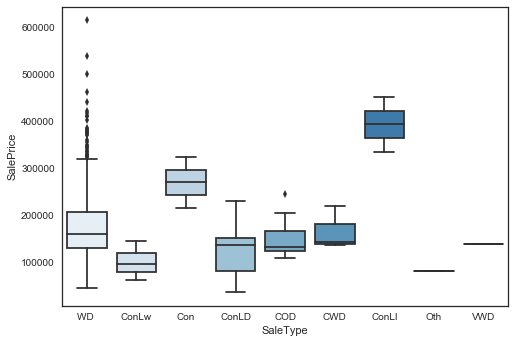

In [135]:
fig,ax =plt.subplots()
sns.boxplot(x='SaleType',y=Y,data=train,palette='Blues')

In [136]:
train["SaleType"] = train.SaleType.replace({'VWD':'WD ','Oth':'WD '
                                           })

In [137]:
train.SaleType.value_counts()

WD       774
ConLD     12
COD        8
ConLw      3
CWD        3
Con        2
ConLI      2
Name: SaleType, dtype: int64

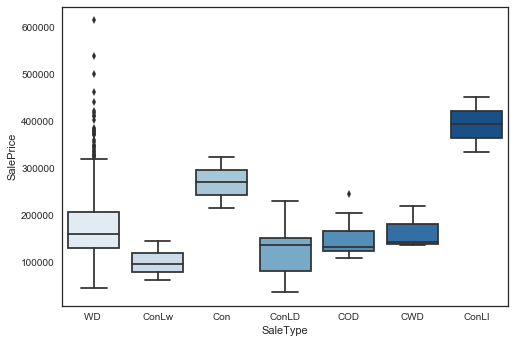

In [138]:
fig,ax =plt.subplots()
sns.boxplot(x='SaleType',y=Y,data=train,palette='Blues')

In [139]:
train.MSSubClass = train.MSSubClass.replace({'SC150':'SC160'})

In [140]:
numerical = list(train.dtypes[all_data.dtypes != "object"].index)
categorical = list(train.dtypes[all_data.dtypes == "object"].index)

In [141]:
werid_categorical = {}
for i in categorical:
    u1 = train[i].unique()
    u2 = test[i].unique()
    if len(u1) != len(u2):
        print('We are now in variable:',i)
        print(len(u2)-len(u1),'different levels between train data and test data')
        werid_categorical[i] = 0
        # Check which level is the unique one
        
        for l in u2:
            if l not in u1:
                print('-----')
                print('the test data has a new level:',l)
                #print((test[i]==l).sum(),'observations in test data has this new level',l)
        print('*************')

('We are now in variable:', 'Heating')
(-1, 'different levels between train data and test data')
*************
('We are now in variable:', 'MiscFeature')
(2, 'different levels between train data and test data')
-----
('the test data has a new level:', 'TenC')
-----
('the test data has a new level:', 'Othr')
*************


In [142]:
print(train.MiscFeature.value_counts())
print(test.MiscFeature.value_counts())

None    782
Shed     21
Gar2      1
Name: MiscFeature, dtype: int64
None    1536
Shed      65
Gar2       4
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


In [143]:
train = train.drop('MiscFeature',axis=1)
test = test.drop('MiscFeature',axis=1)

In [144]:
print(train.Heating.value_counts())
print(test.Heating.value_counts())

GasA     792
GasW       8
OthW       1
Wall       1
Grav       1
Floor      1
Name: Heating, dtype: int64
GasA    1582
GasW      16
Grav       5
Wall       4
OthW       1
Name: Heating, dtype: int64


In [145]:
train.Heating.replace({ 'Grav' : 'Oth', 'Wall' : 'Oth','Floor':'Oth','OthW':'Oth'},inplace=True)

In [146]:
test.Heating.replace({'Grav' : 'Oth', 'Wall' : 'Oth','OthW':'Oth'},inplace=True)

In [147]:
print(train.Heating.value_counts())
print(test.Heating.value_counts())

GasA    792
GasW      8
Oth       4
Name: Heating, dtype: int64
GasA    1582
GasW      16
Oth       10
Name: Heating, dtype: int64


## Converting skewness features

In [148]:
def getting_dummies(df,categorical):
    for i in categorical:
        dummies = pd.get_dummies(df[[i]],  drop_first=True)
        df=df.join(dummies)
        df=df.drop(i, axis=1)
    return df

In [149]:
X_train_tree = train.copy()
X_test_tree = test.copy()
Y_tree = Y.copy()

In [150]:
X_train_tree.head(3)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,Age,TimeSinceSold,YearsSinceRemodel,GOODneighborhood,Near_park_Condition12
0,SC20,RL,7000,Pave,None,IR1,Lvl,CulDSac,Gtl,CollgCr,...,0,0,0,0,0,38,7,4,0,0
1,SC20,RL,11767,Pave,None,Reg,Lvl,Inside,Gtl,Edwards,...,0,1,1,0,0,66,7,59,0,0
2,SC60,RL,9675,Pave,None,Reg,Lvl,Inside,Gtl,Somerst,...,0,1,0,0,0,11,7,4,1,0


In [151]:
d1 = train.copy()
d2 = test.copy()
all_data = pd.concat(
    (d1,
     d2
     ))

In [152]:
numerical = list(all_data.dtypes[all_data.dtypes != "object"].index)
categorical = list(all_data.dtypes[all_data.dtypes == "object"].index)

In [153]:
from scipy.stats import skew
# Check other numerical feature for whether they have skweness >0.75

skewed_feats = all_data[numerical].apply(skew) # Compute skewness without NaN
                                        # lambda x: 
                                          # Defines a function, by default applying to each column
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]

In [154]:
# Log transformation for these skewed_features
skewed_feats = list(skewed_feats.index)
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [155]:
train = all_data[:train.shape[0]].copy() 
test = all_data[train.shape[0]:].copy()

# Getting dummies

In [156]:
train = getting_dummies(train,categorical)

In [157]:
train.shape

(804, 171)

In [158]:
test = getting_dummies(test,categorical)

In [159]:
test.shape

(1608, 171)

In [160]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [161]:
Y = np.log1p(Y)

In [162]:
X_train = train.copy()  
X_test = test.copy()

In [163]:
X_train.head(3)

,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD
0,8.853808,5,8,4.51086,1.609438,1.609438,1.386294,1.386294,0.693147,5,...,0,0,0,0,0,0,0,0,0,1
1,9.373139,5,5,0.00000,1.386294,1.386294,1.098612,1.386294,1.098612,3,...,0,0,0,0,0,0,0,0,0,1
2,9.177404,7,5,0.00000,1.609438,1.386294,1.609438,1.386294,1.098612,6,...,0,0,0,0,0,0,0,0,0,1


In [164]:
# standardization
mu=X_train.mean()
sigma=X_train.std()

X_train=(X_train-mu)/sigma
X_test=(X_test-mu)/sigma

In [165]:
X_train.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_WD
0,-0.425639,-0.756585,2.170752,0.950492,1.272531,2.346451,-0.257611,0.16656,-0.535400,0.667279,...,-0.43285,-0.206757,-0.213207,-0.213207,-0.061161,-0.049907,-0.123015,-0.049907,-0.061161,0.196752
1,0.567394,-0.756585,-0.596612,-0.773172,-0.601926,-0.260724,-1.284404,0.16656,0.593508,-0.301119,...,-0.43285,-0.206757,-0.213207,-0.213207,-0.061161,-0.049907,-0.123015,-0.049907,-0.061161,0.196752
2,0.193121,0.767962,-0.596612,-0.773172,1.272531,-0.260724,0.538831,0.16656,0.593508,1.151479,...,-0.43285,-0.206757,-0.213207,-0.213207,-0.061161,-0.049907,-0.123015,-0.049907,-0.061161,0.196752
3,-2.673325,0.767962,-0.596612,1.282564,1.272531,-0.260724,0.538831,0.16656,-0.535400,1.151479,...,-0.43285,-0.206757,-0.213207,-0.213207,-0.061161,-0.049907,-0.123015,-0.049907,-0.061161,0.196752
4,0.022714,0.767962,0.325842,-0.773172,-0.601926,-0.260724,-0.257611,0.16656,-0.535400,-1.269517,...,-0.43285,-0.206757,-0.213207,-0.213207,-0.061161,-0.049907,-0.123015,-0.049907,16.329970,-5.076210


In [166]:
def generate_coef_re(method):
    method_coef = pd.DataFrame(method.coef_.round(4),index=X_train.columns)
    return method_coef[method_coef.iloc[:,0] == 0]

In [167]:
# OLS
import statsmodels.api as sm
X_train_2 = sm.add_constant(train)
model_ols = sm.OLS(Y,train)
results = model_ols.fit()
# results.summary()

In [168]:
# Residuals test for outliers
df = results.outlier_test()
selected_outlier = df[abs(df['student_resid'])>4]

C:\PROGRA~2\ANACON~1\lib\site-packages\statsmodels\stats\outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\PROGRA~2\ANACON~1\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\PROGRA~2\ANACON~1\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\PROGRA~2\ANACON~1\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\PROGRA~2\ANACON~1\lib\site-packages\statsmodels\stats\multitest.py:147: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
C:\PROGRA~2\ANACON~1\lib\site-packages\statsmodels\stats\multitest.py:251: RuntimeWarning: invalid value encountered in greater
  pvals_cor

In [169]:
selected_outlier

,student_resid,unadj_p,bonf(p)
157,-4.797823,1.997089e-06,1.605659e-03
449,-4.026654,6.334875e-05,5.093240e-02
452,-7.263422,1.098816e-12,8.834481e-10


In [171]:
out_lier = list(selected_outlier.index)
model_ols_residuals = results.predict() - Y
selected_Y = Y[out_lier]
selected_outlier = model_ols_residuals[out_lier]
other_idx = []
for i in Y.index:
    if i not in out_lier:
        other_idx.append(i)
other_Y = Y[other_idx]
other_residual = model_ols_residuals[other_idx]

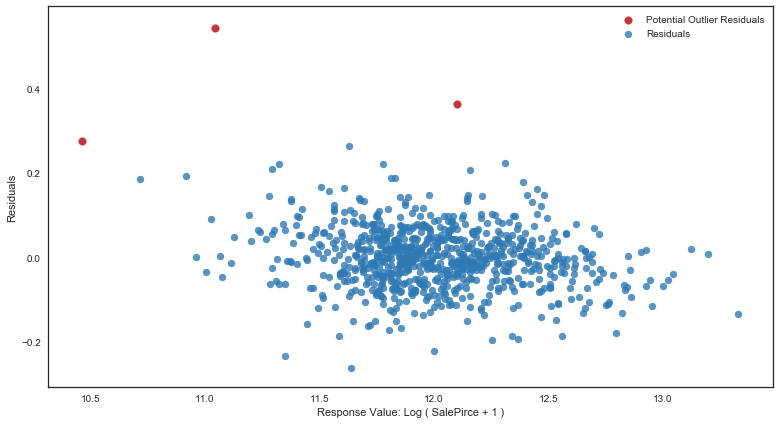

In [172]:
# Plot the residuals vs the response value, highlight the outliers
sns.set(style='white')
fig, ax = plt.subplots(figsize=(13,7))
p = sns.color_palette('RdBu')

ax.scatter(selected_Y,selected_outlier,color=p[0],s=60,label='Potential Outlier Residuals')
ax.scatter(other_Y,other_residual,color=p[5],alpha=0.8,label='Residuals')
plt.xlabel('Response Value: Log ( SalePirce + 1 )')
plt.ylabel('Residuals')
plt.legend(loc='upper right')

In [173]:
X_train_3 = X_train.copy()
Y_2 = Y.copy()
# Drop the outliers
for i in out_lier:
    X_train_3 = X_train_3.drop(i)
    Y_2 = Y_2.drop(i)

In [174]:
print(len(out_lier))
print(X_train_3.shape)
print(X_train.shape)
print(Y_2.shape)

3
(801, 171)
(804, 171)
(801L,)


In [175]:
# OLS again
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train_3,np.ravel(Y_2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [220]:
from sklearn.model_selection import cross_val_score
ols = LinearRegression()
from sklearn.model_selection import KFold
kf=KFold(len(X_train_3), shuffle=True, random_state=1) 

scores = np.mean(-cross_val_score(ols, X_train_3, np.ravel(Y_2), cv=kf, scoring = 'neg_mean_squared_error'))

In [221]:
ols_scores = np.sqrt(scores)

In [238]:
ols.fit(X_train_3,np.ravel(Y_2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Method 2.
# Lasso

In [182]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=len(X_train_3),max_iter=50000)
lasso.fit(X_train_3, np.ravel(Y_2))

LassoCV(alphas=None, copy_X=True, cv=801, eps=0.001, fit_intercept=True,
    max_iter=50000, n_alphas=100, n_jobs=1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [183]:
lasso.alpha_

0.0019458151221442171

In [185]:
# Store the lasso model
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = lasso.alpha_)

In [186]:
from sklearn.model_selection import KFold
kf=KFold(len(X_train_3), shuffle=True, random_state=1) 

scores = np.mean(-cross_val_score(lasso, X_train_3, np.ravel(Y_2), cv=kf, scoring = 'neg_mean_squared_error'))

In [187]:
lasso_scores = np.sqrt(scores)

In [188]:
lasso_scores

0.087836393166532564

In [190]:
lasso.fit(X_train_3,Y_2)

Lasso(alpha=0.0019458151221442171, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [191]:
coef = pd.Series(lasso.coef_, index = X_train_3.columns)

In [192]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 99 variables and eliminated the other 72 variables


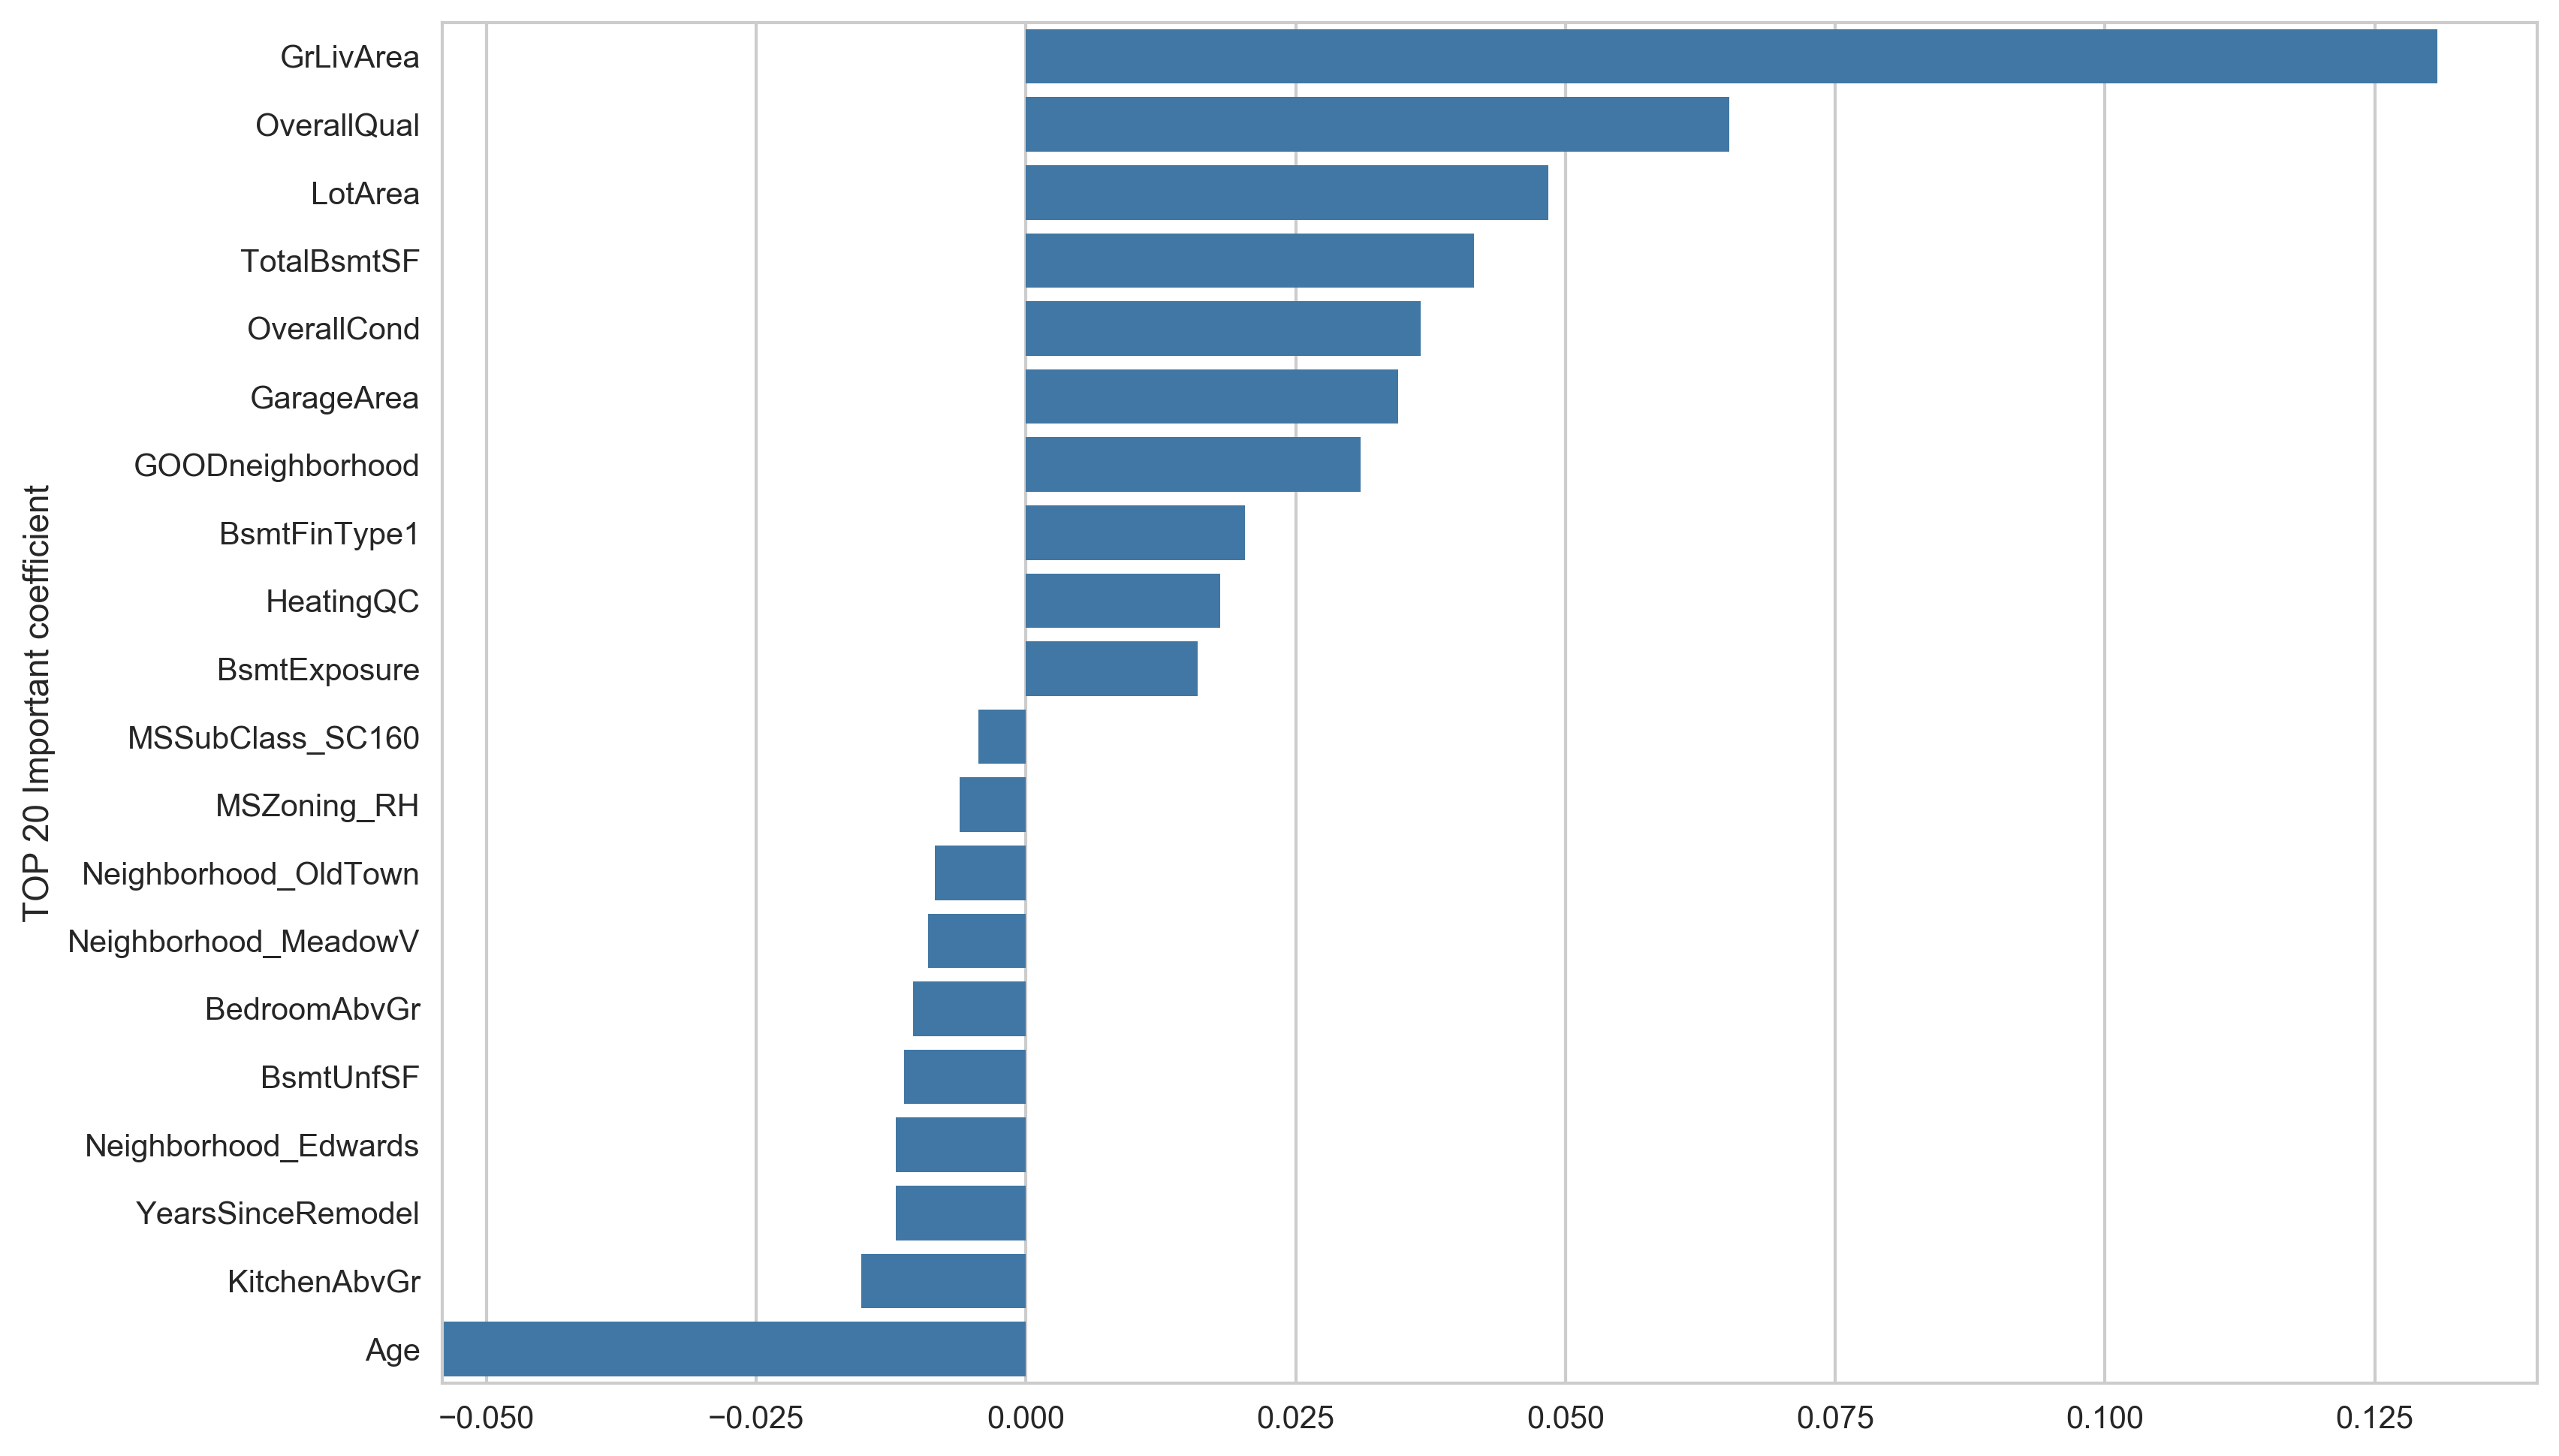

In [194]:
important_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
important_coef = important_coef.sort_values(ascending=False)
sns.set(style='whitegrid')
fig ,ax = plt.subplots(figsize=(12,8),dpi=300)
p = sns.color_palette('RdBu')
sns.barplot(x=important_coef,y=important_coef.index,order=list(important_coef.index),color=p[5])
ax.set(ylabel='TOP 20 Important coefficient')

# Method 3.
# ElasticNet

In [195]:
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(l1_ratio=[0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99], cv=100)
enet.fit(X_train_3,np.ravel(Y_2))## ElasticNetCv

ElasticNetCV(alphas=None, copy_X=True, cv=100, eps=0.001, fit_intercept=True,
       l1_ratio=[0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [196]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)
enet.fit(X_train,np.ravel(Y))

ElasticNet(alpha=0.0019654698203476931, copy_X=True, fit_intercept=True,
      l1_ratio=0.98999999999999999, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [202]:
scores = np.mean(-cross_val_score(
    enet, X_train_3, np.ravel(Y_2), cv=kf, scoring = 'neg_mean_squared_error'))

In [203]:
enet_scores = np.sqrt(scores)

In [204]:
enet_scores

0.087837071123373925

# Method 4
# PLS

In [200]:
from statlearning import plsCV
pls = plsCV(X_train, Y)

statlearning.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\PROGRA~2\ANACON~1\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 159
  warnings.warn('X scores are null at iteration %s' % k)
C:\PROGRA~2\ANACON~1\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 160
  warnings.warn('X scores are null at iteration %s' % k)
C:\PROGRA~2\ANACON~1\lib\site-packages\sklearn\cross_decomposition\pls_.py:319: UserWarning: X scores are null at iteration 161
  warnings.warn('X scores are null at iteration %s' % k)


In [205]:
kf=KFold(len(X_train), shuffle=True, random_state=1) 
pls_scores = np.sqrt(np.mean(-cross_val_score(
    pls, X_train, np.ravel(Y), cv=kf, scoring = 'neg_mean_squared_error')))

In [206]:
pls_scores

0.10078063649436521

# Method 5
# GBT

In [210]:
X_train_tree =getting_dummies(X_train_tree,categorical)
X_test_tree = getting_dummies(X_test_tree,categorical)

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

tuning_parameters = [{
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2,3,4,5]
}]

gb = GridSearchCV(model, tuning_parameters, cv=10, return_train_score=False, n_jobs=4)
gb.fit(X_train_tree,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'n_estimators': [250, 500, 750, 1000, 1500], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [213]:
gb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 750}

In [230]:
# Store the model
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate= 0.05, max_depth = 3, n_estimators= 750)
gb.fit(X_train_tree, Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=750,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [234]:
methods = [ols, lasso, enet, pls, gb]
rows = ['OLS', 'Lasso', 'Elastic Net', 'PLS', 'GB']
results = pd.DataFrame(0.0, columns=['CV RMSE','MSE'], index=rows) # initialising a dataframe to hold the results


methods_d = {k: v for k, v in zip(rows, methods)}


In [235]:
results['CV RMSE'] = [ols_scores,lasso_scores,enet_scores,pls_scores,0]

In [239]:
from sklearn.metrics import mean_squared_error
for i in methods_d:
    results.loc[i,'MSE'] = mean_squared_error(Y,methods_d[i].predict(X_train))
results.loc['GB','MSE'] = mean_squared_error(Y,gb.predict(X_train_tree))

In [241]:
results.to_csv('model_result2.csv')